### Exploring the data from extraction

In [159]:
! pip install helpers

In [160]:
import pandas as pd
import sqlalchemy as alch
from getpass import getpass
import re
import datetime as dt
from helpers import *


from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.data
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import csv from extraction notebook

In [161]:
df = pd.read_csv("data/queen-lyrics.csv")

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artist_name       194 non-null    object
 1   album_name        194 non-null    object
 2   album_link        194 non-null    object
 3   album_cover       194 non-null    object
 4   album_popularity  194 non-null    int64 
 5   release_date      194 non-null    object
 6   total_tracks      194 non-null    int64 
 7   tracks            194 non-null    object
 8   lyrics            138 non-null    object
dtypes: int64(2), object(7)
memory usage: 13.8+ KB


### Tranformation and Enrichment Process:
1. Drop NaNs
2. Replace paranthesis, brackets, line breaks, and tabs
3. Transform the column `release date` to datetime
4. remove stop words and keep unique. 
4. Transform all words to lower case
5. Apply Stem Function to eliminate words suffixes. 
6. Apply Textblob polarity method to calculate lyrics sentiment
7. Assign category to lyrcs based on polarity

In [163]:
df.dropna(inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 190
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artist_name       138 non-null    object
 1   album_name        138 non-null    object
 2   album_link        138 non-null    object
 3   album_cover       138 non-null    object
 4   album_popularity  138 non-null    int64 
 5   release_date      138 non-null    object
 6   total_tracks      138 non-null    int64 
 7   tracks            138 non-null    object
 8   lyrics            138 non-null    object
dtypes: int64(2), object(7)
memory usage: 10.8+ KB


In [165]:
def little_cleaning_function (df):
    df["lyrics"] = df["lyrics"].str.replace(r"\(.+\)", "", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r"\[.+\]", "", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r"'", "`", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r'lyrics', " ", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r'Lyrics', " ", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r'\n', " ", regex=True)
    df["lyrics"] = df["lyrics"].str.replace(r'\s+', " ", regex=True)
    
    df["lyrics"] = df["lyrics"].str.replace(r'[-|n]na[- | a]', " ", regex=True)  
    return df

In [166]:
little_cleaning_function (df)

,artist_name,album_name,album_link,album_cover,album_popularity,release_date,total_tracks,tracks,lyrics
0,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Keep Yourself Alive,Keep Yourself Alive Taking off I was told a mi...
1,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Doing Alright,Suicide Sally & Johnny Guitar Suicide Sally an...
2,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Great King Rat,Great King Rat Great King Rat died today Born ...
5,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,The Night Comes Down,The Night Comes Down When I was young it came ...
8,Queen,Queen,https://open.spotify.com/album/2hZTdsWsAqlgrYG...,https://i.scdn.co/image/ab67616d0000b2731de318...,47,1973-07-13,16,Jesus,Jesus And then I saw Him in the crowd A lot of...
...,...,...,...,...,...,...,...,...,...
179,Queen,The Game,https://open.spotify.com/album/58alCatewkjNm9I...,https://i.scdn.co/image/ab67616d0000b273056e90...,77,1980-06-27,10,Coming Soon,"Coming Soon Uuuh, uuuh, uuuh Oh, o-ooh, ooh, o..."
180,Queen,The Game,https://open.spotify.com/album/58alCatewkjNm9I...,https://i.scdn.co/image/ab67616d0000b273056e90...,77,1980-06-27,10,Save Me,Save Me It started off so well They said we ma...
183,Queen,Jazz,https://open.spotify.com/album/2yuTRGIackbcReL...,https://i.scdn.co/image/ab67616d0000b2737c39dd...,75,1978-11-10,13,Jealousy,"Jealousy Oh, how wrong can you be? Oh, to fall..."
188,Queen,Jazz,https://open.spotify.com/album/2yuTRGIackbcReL...,https://i.scdn.co/image/ab67616d0000b2737c39dd...,75,1978-11-10,13,In Only Seven Days,In Only Seven Days Monday Start of my holiday ...


In [167]:
df['release_date'] = pd.to_datetime(df['release_date'], dayfirst=True)

In [168]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

In [169]:
df.sample()

,artist_name,album_name,album_link,album_cover,album_popularity,release_date,total_tracks,tracks,lyrics,release_year
178,Queen,The Game,https://open.spotify.com/album/58alCatewkjNm9I...,https://i.scdn.co/image/ab67616d0000b273056e90...,77,1980-06-27,10,Sail Away Sweet Sister,"Sail Away Sweet Sister Hey, little babe, you`r...",1980


### Create DataFrame of words to look at how they use words in different decades

In [170]:
def tokenize(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    return tokens_without_sw

In [171]:
df['cleaned_lyrics'] = df['lyrics'].apply(tokenize)


In [172]:
def unique_words(text):
    unique = []
    for word in text:
        if word not in unique:
            unique.append(word)
    return unique

In [173]:
df['cleaned_lyrics'] = df['cleaned_lyrics'].apply(unique_words)




In [174]:
df_2 = df.explode('cleaned_lyrics')[['release_year', 'cleaned_lyrics']]

In [175]:
df_2

,release_year,cleaned_lyrics
0,1973,Keep
0,1973,Yourself
0,1973,Alive
0,1973,Taking
0,1973,I
...,...,...
190,1978,tricks
190,1978,dance
190,1978,honey
190,1978,Time


In [176]:
df_2.to_csv("data/words_analysis.csv", index=False)

In [177]:
# 1. create function that handles all the text processing. 
# 2. pass data through function
def data_processing(lyrics):
    lyrics = lyrics.lower()
   
    return lyrics

In [178]:
df['lyrics'] = df['lyrics'].apply(data_processing)

In [179]:
print(df['lyrics'].iloc[0], '\n')
print(df['lyrics'].iloc[1], '\n')
print(df['lyrics'].iloc[2], '\n')
print(df['lyrics'].iloc[3], '\n')
print(df['lyrics'].iloc[4], '\n')

keep yourself alive taking off i was told a million times of all the troubles in my way mind you grow a little wiser, little better every day but if i crossed a million rivers and i rode a million miles then i`d still be where i started, bread and butter for a smile well, i sold a million mirrors in a shop in alley way but i never saw my face in any window any day now they say your folks are telling you, “be a superstar” but i tell you, just be satisfied and stay right where you are keep yourself alive , keep yourself alive take you all your time and-a money, honey, you`ll survive well, i`ve loved a million women in a belladonic haze and i ate a million dinners brought to me on silver trays give me everything i need to feed my body and my soul and i`ll grow a little bigger, maybe that can be my goal i was told a million times of all the people in my way how i had to keep on trying and get better every day but if i crossed a million rivers and i rode a million miles then i`d still be wh

### NLP / Sentiment Analysis of QUEEN'S LYRICS

In [180]:
stemer = PorterStemmer()

def stemming(df):
    lyrics = [stemer.stem(word) for word in df]
    return df


In [181]:
df['lyrics'] = df['lyrics'].apply(lambda x: stemming(x))

In [182]:
def polarity(line):
    return TextBlob(line).sentiment.polarity

In [183]:
df['polarity'] = df['lyrics'].apply(polarity)

In [184]:
def sentiment(label):
    if label < 0:
        return 'feeling the blues :('
    elif label == 0:
        return 'elevator song :|'
    elif label > 0:
        return 'good times :D'

In [185]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [186]:
df.sample()

,artist_name,album_name,album_link,album_cover,album_popularity,release_date,total_tracks,tracks,lyrics,release_year,cleaned_lyrics,polarity,sentiment
130,Queen,The Works,https://open.spotify.com/album/5RS9xkMuDmeVISq...,https://i.scdn.co/image/ab67616d0000b2735be5f8...,69,1984-02-27,9,Man On The Prowl,"man on the prowl hey, i`m go take a little wal...",1984,"[Man, Prowl, Hey, ,, I, `, Walk, wild, side, l...",-0.038039,feeling the blues :(


<AxesSubplot: xlabel='sentiment', ylabel='count'>

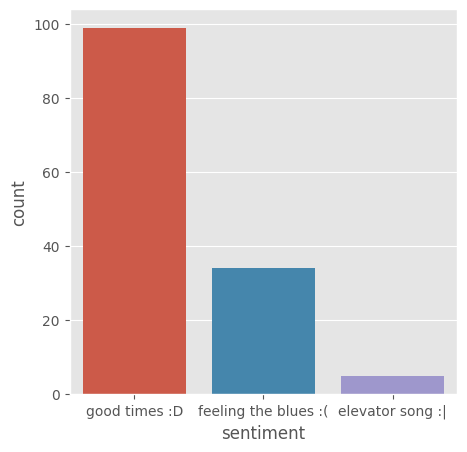

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data=df)

In [188]:
lemmatizer = WordNetLemmatizer()
words = df["lyrics"].iloc[1]
print(lemmatizer.lemmatize(words))

suicide sally & johnny guitar suicide sally and johnny guitar she overdosed and crashed in her car amphetamine jab, shot a hole in his head ran out of veins, ran out of friends alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright gearhead candy is a natural queen bed motorcycle, you know what i mean she got her wings, giving head to a priest the fucker choked on his rosary beads alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright stone cold sally is a stubbled whore her face is plastic, so is her soul she hates her body she is a he striptease and pre-teased, feeling diseased alright, alright, oh baby baby, you`re doing alright alright, alright, oh baby baby, you`re doing alright hey rock`n`roll doctor rocknroll nurse gimme a shot gimme some pills i dont need a knife i dont nee

### Export cleaned df for loading in DB

In [189]:
df.to_csv("data/cleaned-lyrics-queen.csv", index=False)